In [2]:
from JupyterImport import *
root_logger.setLevel(logging.WARNING)

In [25]:
# dats = get_dats(list(range(7848, 7855)))
# dats = get_dats((8885, 8885+1))
dats = [get_dat(8799)]

# Check info about dats

In [26]:
for dat in dats:
    print(dat.datnum, dat.Logs.comments)

8799 transition, square entropy, repeat, 


# Functions that are used below

# Display Averaged Data

## Avg CT Data

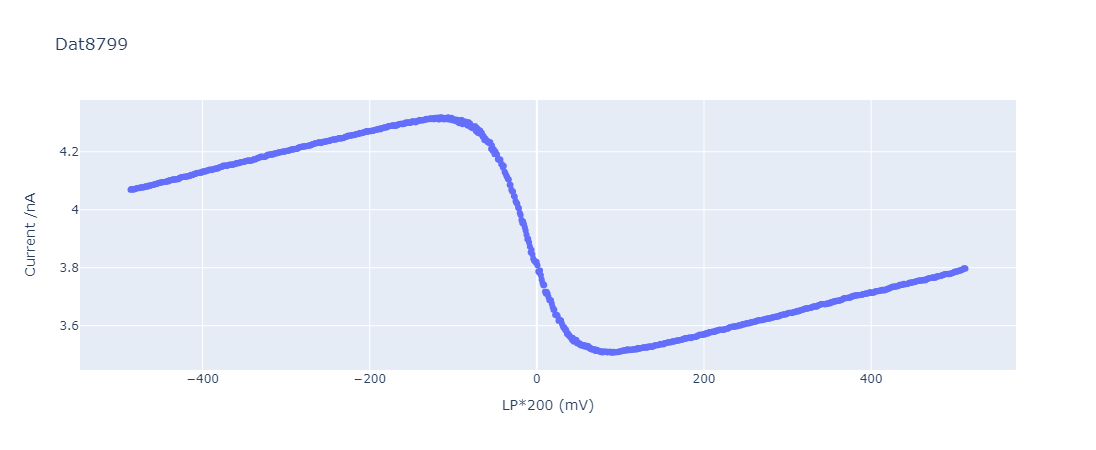

In [27]:
figs = list()
for dat in dats[:1]:
    x = dat.Data.x_array
    y = dat.Transition.avg_data
    
    x_label = dat.Logs.x_label
    y_label = "Current /nA"

    max_points_per_row = 1000

    x, y = CU.bin_data([x, y], bin_size = np.ceil(y.shape[-1]/max_points_per_row))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(mode = 'markers', x=x, y=y))
    fig.update_layout(xaxis_title = x_label, 
                      yaxis_title = y_label,
                     title = f'Dat{dat.datnum}')
    figs.append(fig)

for fig in figs:
    fig.show()    

## Avg Entropy Data

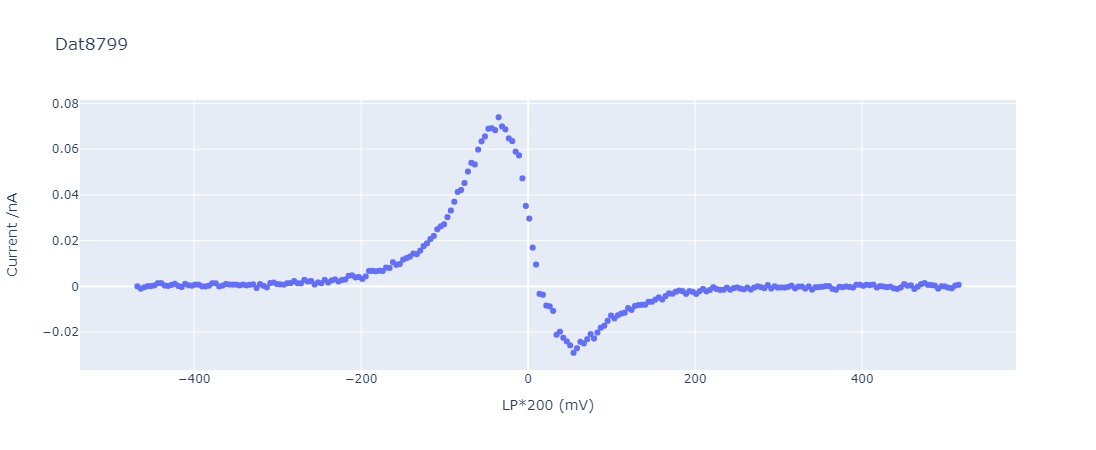

In [28]:
figs = list()
for dat in dats[:1]:
    x = dat.SquareEntropy.Processed.outputs.x
    y = dat.SquareEntropy.Processed.outputs.entropy_signal
    
    x_label = dat.Logs.x_label
    y_label = "Current /nA"

    max_points_per_row = 1000

    x, y = CU.bin_data([x, y], bin_size = np.ceil(y.shape[-1]/max_points_per_row))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(mode = 'markers', x=x, y=y))
    fig.update_layout(xaxis_title = x_label, 
                      yaxis_title = y_label,
                     title = f'Dat{dat.datnum}')
    figs.append(fig)

for fig in figs:
    fig.show()    

# Display 2D waves

## CT 2D

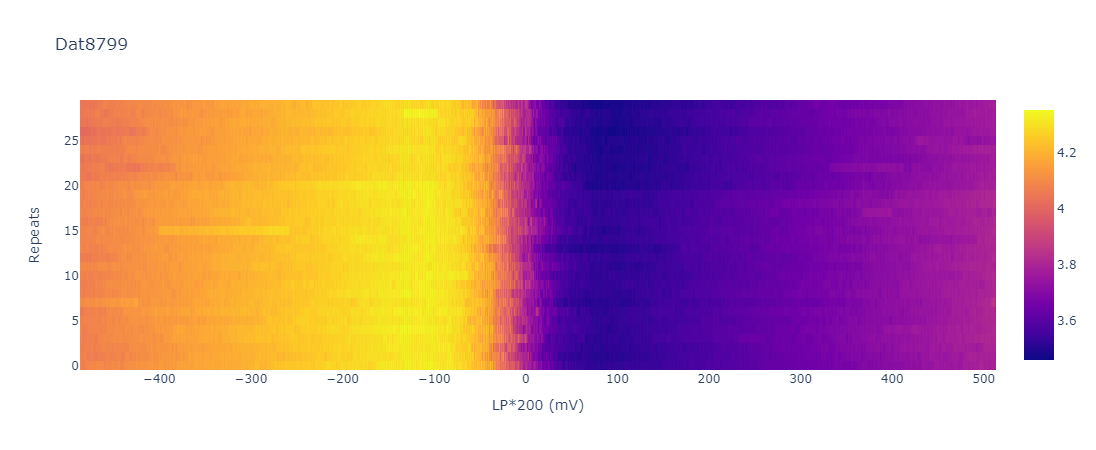

In [29]:
figs = list()
for dat in dats:
    x = dat.Data.x_array
    z = dat.Data.Exp_cscurrent_2d
    y = list(range(z.shape[0]))

    x_label = dat.Logs.x_label
    y_label = dat.Logs.y_label
    z_label = "Current /nA"

    max_points_per_row = 1000

    x, z = CU.bin_data([x, z], bin_size = np.ceil(z.shape[-1]/max_points_per_row))
    fig = go.Figure()
    fig.add_trace(go.Heatmap(x=x, y=y, z=z))
    fig.update_layout(xaxis_title = x_label, 
                      yaxis_title = y_label,
                     coloraxis = dict(colorbar=dict(title=z_label)),
                     title = f'Dat{dat.datnum}')
    figs.append(fig)

for fig in figs:
    fig.show()

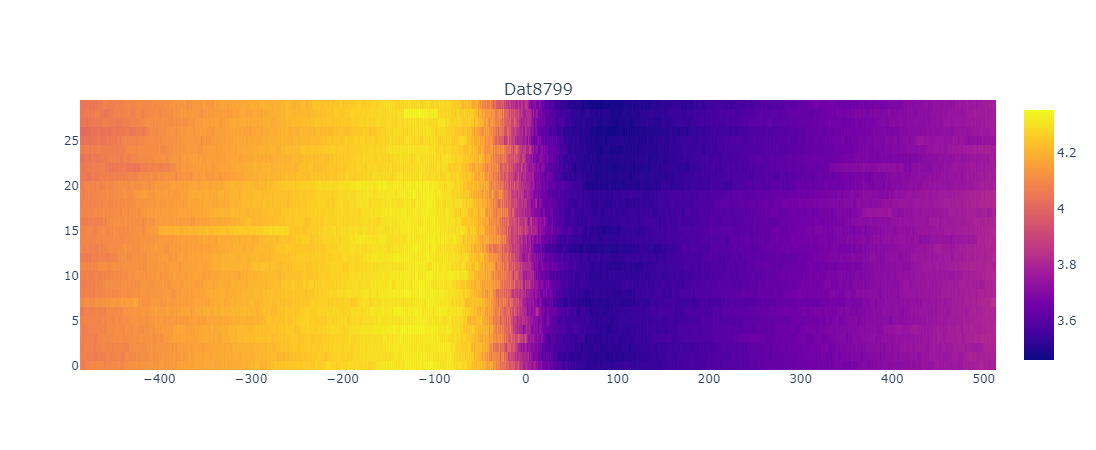

In [30]:
fig = make_subplots(1, len(figs), subplot_titles = [f.layout.title.text for f in figs])

for i, f in enumerate(figs):
    fig.add_trace(f.data[0],row=1, col=i+1)
    fig.data[-1].update(coloraxis='coloraxis')
fig

## Entropy 2D

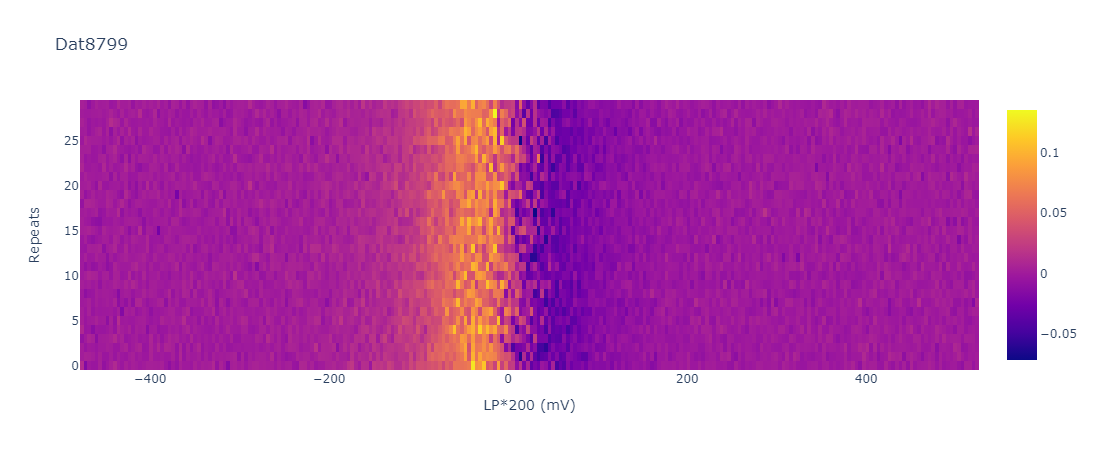

In [31]:
figs = list()
for dat in dats:
    x = dat.SquareEntropy.Processed.outputs.x
    z = dat.SquareEntropy.entropy_data
    y = list(range(z.shape[0]))

    x_label = dat.Logs.x_label
    y_label = dat.Logs.y_label
    z_label = "Current /nA"

    max_points_per_row = 1000

    x, z = CU.bin_data([x, z], bin_size = np.ceil(z.shape[-1]/max_points_per_row))
    fig = go.Figure()
    fig.add_trace(go.Heatmap(x=x, y=y, z=z))
    fig.update_layout(xaxis_title = x_label, 
                      yaxis_title = y_label,
                     coloraxis = dict(colorbar=dict(title=z_label)),
                     title = f'Dat{dat.datnum}')
    figs.append(fig)

for fig in figs:
    fig.show()

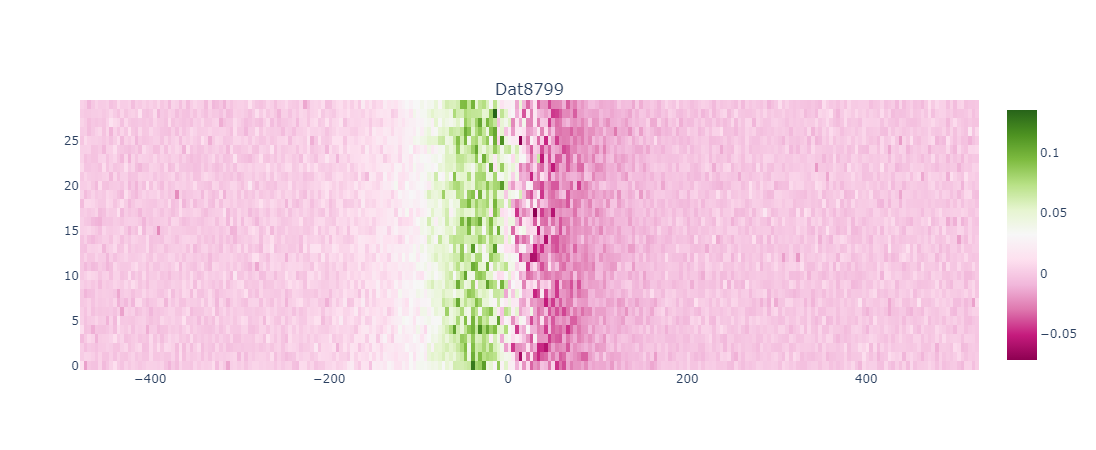

In [32]:
fig = make_subplots(1, len(figs), subplot_titles = [f.layout.title.text for f in figs])

for i, f in enumerate(figs):
    fig.add_trace(f.data[0],row=1, col=i+1)
    fig.data[-1].update(coloraxis='coloraxis')
fig

# Fit info about rows of data

## Transition Fits

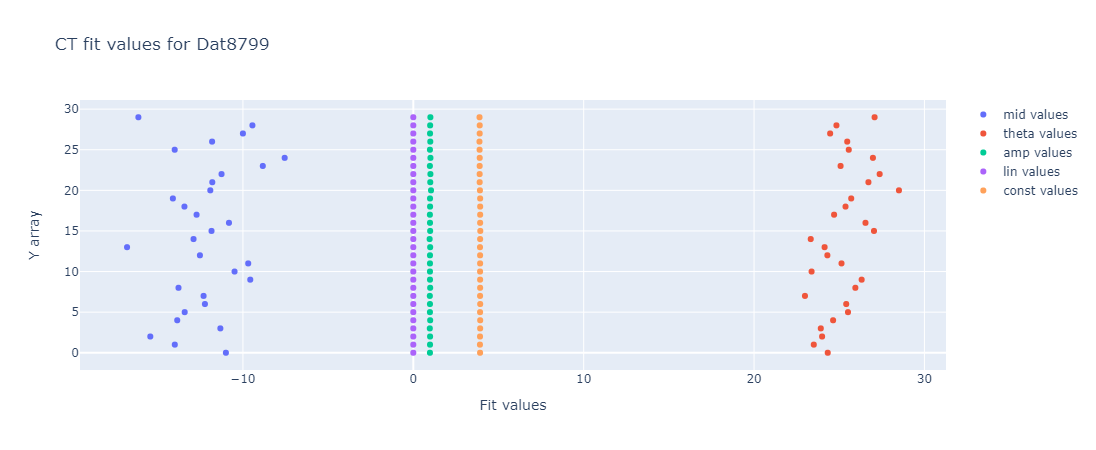

In [33]:
from src.DatObject.Attributes import Transition as T, Entropy as E, SquareEntropy as SE

figs, all_ct_fits = list(), list()
for dat in dats:

    x = dat.Data.x_array
    z = dat.Data.Exp_cscurrent_2d
    y = np.array(range(z.shape[0]))

    x, z = CU.bin_data([x, z], bin_size=np.ceil(z.shape[-1]/max_points_per_row))

    pars = T.get_param_estimates(x, z)
    fits = T.transition_fits(x, z, func=T.i_sense, params=pars, auto_bin=True)
    all_ct_fits.append(fits)
    
    fig = go.Figure()
    for k in fits[0].best_values.keys():
        fvals = [f.best_values.get(k, None) for f in fits]
        fig.add_trace(go.Scatter(mode='markers', x = fvals, y = y, name=f'{k} values'))

    fig.update_layout(xaxis_title='Fit values', yaxis_title='Y array', title=f'CT fit values for Dat{dat.datnum}')
    figs.append(fig)

for fig in figs:
    fig.show()

In [34]:
for fig in figs:
    fig.write_html(f'Exports/{fig.layout.title.text}.html')

## Entropy Fits

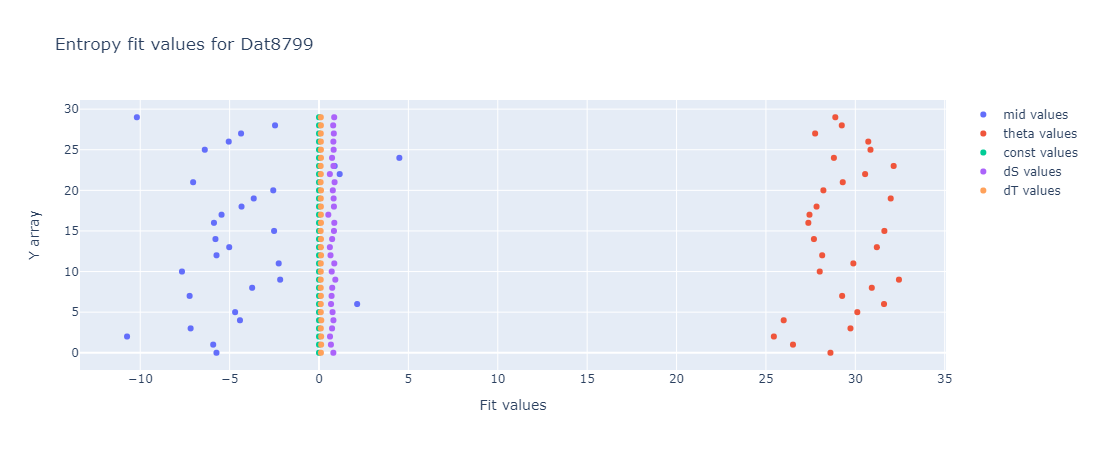

In [35]:
figs, all_entropy_fits = list(), list()
for dat in dats:
    x = dat.SquareEntropy.Processed.outputs.x
    y = np.array(range(z.shape[0]))
    z = dat.SquareEntropy.entropy_data

    x, z = CU.bin_data([x, z], bin_size=np.ceil(z.shape[-1]/max_points_per_row))

    pars = E.get_param_estimates(x, z)
    fits = E.entropy_fits(x, z, params=pars, auto_bin=True)
    all_entropy_fits.append(fits)

    fig = go.Figure()
    for k in fits[0].best_values.keys():
        y = y  # From above
        fvals = [f.best_values.get(k, None) for f in fits]
        fig.add_trace(go.Scatter(mode='markers', x = fvals, y = y, name=f'{k} values'))

    fig.update_layout(xaxis_title='Fit values', yaxis_title='Y array', title=f'Entropy fit values for Dat{dat.datnum}')
    figs.append(fig)
    
for fig in figs:
    fig.show()

In [36]:
for fig in figs:
    fig.write_html(f'Exports/{fig.layout.title.text}.html')

# Display Row(s) of 2D wave

## CT Rows

{'mid': -10.997908876131193, 'theta': 24.324257104050677, 'amp': 0.9775273168990679, 'lin': 0.0006917714605725322, 'const': 3.919063897522934}


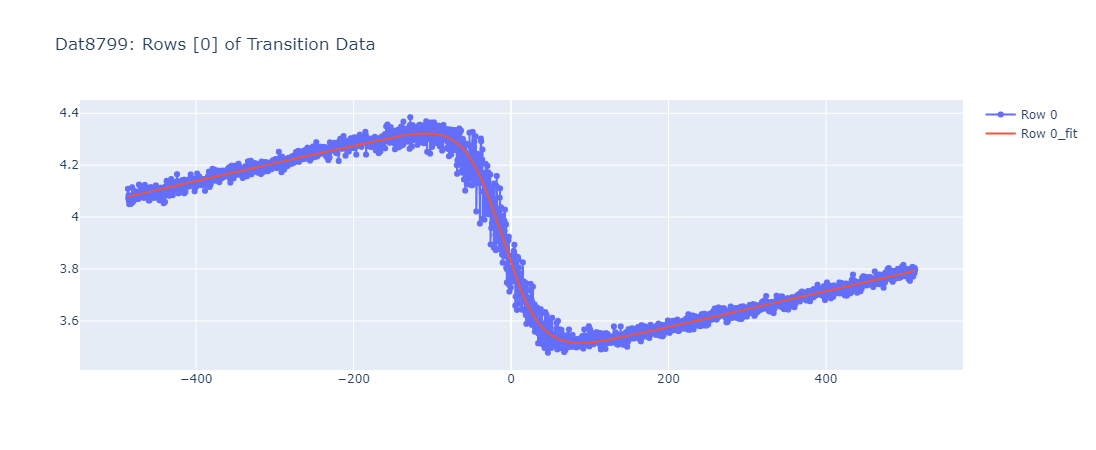

In [38]:
if len(dats) == 1:
    datnum = dats[0].datnum
else:
    datnum = 8885
rows = [0]

all_fits = all_ct_fits
# all_fits = all_entropy_fits

dd = {dat.datnum: (dat, fits) for dat, fits in zip(dats, all_fits)}
dat, fits = dd[datnum]

x = dat.Data.x_array
z = dat.Data.Exp_cscurrent_2d

# x = dat.SquareEntropy.Processed.outputs.x
# z = dat.SquareEntropy.entropy_data

# x, z = CU.bin_data([x, z], bin_size=np.ceil(z.shape[-1]/max_points_per_row))
x = x[::50]
z = z[:, ::50]

row_data = z[rows,]
fits_to_show = np.array(fits)[rows,]  

fig = go.Figure()
for i, (r, rnum) in enumerate(zip(row_data, rows)):
    name = f'Row {rnum}'
    fig.add_trace(go.Scatter(mode='markers+lines', x=x, y=r, name=name, legendgroup=name))
    if fits_to_show is not None:
        f = fits_to_show[i]
        fig.add_trace(go.Scatter(mode='lines', x=x, y=f.eval(x=x), legendgroup=name, name=name+'_fit'))
        print(f.best_values)
fig.update_layout(title=f'Dat{dat.datnum}: Rows {rows} of Transition Data')
fig.show()

## Entropy Rows

{'mid': -24.39726356531148, 'theta': 28.93770067267584, 'const': 0, 'dS': 0.3168797277868851, 'dT': 0.062253406336697736}


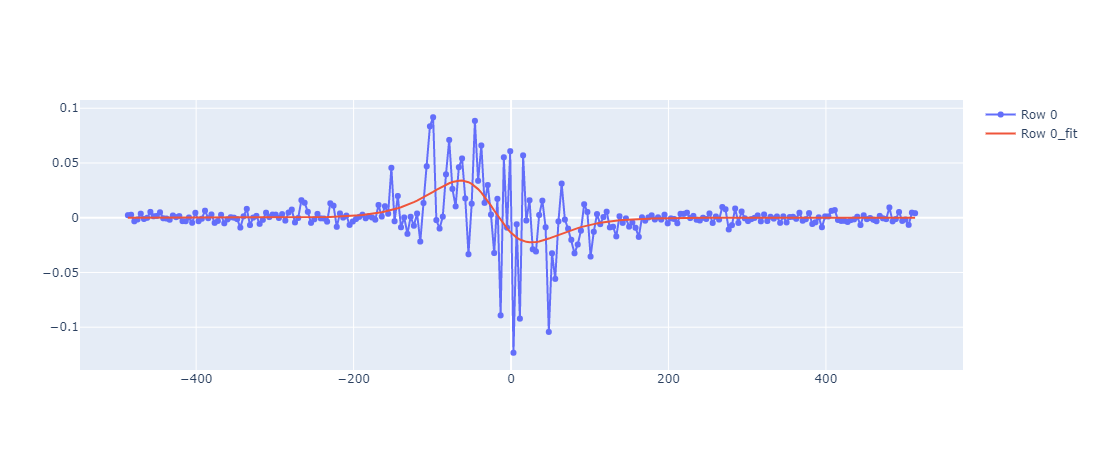

In [17]:
# datnum = 7852
# rows = [4]

all_fits = all_entropy_fits

dd = {dat.datnum: (dat, fits) for dat, fits in zip(dats, all_fits)}
dat, fits = dd[datnum]

x = dat.SquareEntropy.Processed.outputs.x
z = dat.SquareEntropy.entropy_data

x, z = CU.bin_data([x, z], bin_size=np.ceil(z.shape[-1]/max_points_per_row))

row_data = z[rows,]
fits_to_show = np.array(fits)[rows,]  

fig = go.Figure()
for i, (r, rnum) in enumerate(zip(row_data, rows)):
    name = f'Row {rnum}'
    fig.add_trace(go.Scatter(mode='markers+lines', x=x, y=r, name=name, legendgroup=name))
    if fits_to_show is not None:
        f = fits_to_show[i]
        fig.add_trace(go.Scatter(mode='lines', x=x, y=f.eval(x=x), legendgroup=name, name=name+'_fit'))
        print(f.best_values)
fig.show()

# Other random things

In [34]:

for dat in dats:
    print(dat.datnum, dat.Logs.fds, dat.Logs.comments)

4295 {'R2T(10M)': 0, 'TC/0.001': 0, 'LP*2': -330.2, 'LCB': -662.84, 'LCT': -439.76, 'LCSQ': -769.65, 'LCSS': -224, 'LP*200': 1030} transition, square entropy, repeat, , part1of2
4296 {'R2T(10M)': 0, 'TC/0.001': 0, 'LP*2': -330.2, 'LCB': -662.84, 'LCT': -439.76, 'LCSQ': -769.65, 'LCSS': -224, 'LP*200': 230.11} transition, square entropy, repeat, , part2of2
7822 {'R2T/0.001': 0, 'TC/0.001': 0, 'LP*2': -411.99, 'LCB': -679.93, 'LCT/0.196': -1986.7, 'LCSQ': -783.69, 'LCSS': -215.76, 'LP*200': 999.79} transition, square entropy, repeat, stability, 
7843 {'R2T/0.001': 0, 'TC/0.001': 0, 'LP*2': -411.99, 'LCB': -679.93, 'LCT/0.196': -1986.7, 'LCSQ': -783.69, 'LCSS': -215.76, 'LP*200': 599.99} transition, square entropy, repeat, stability, testing stability with step of 0mV from LCT and back, 
7923 {'R2T/0.001': 0, 'TC/0.001': 0, 'LP*2': -316.47, 'LCB': -662.54, 'LCT/0.196': -2244, 'LCSQ': -769.35, 'LCSS': -224, 'LP*200': 999.79} transition, square entropy, repeat, stability, 
7952 {'R2T/0.001'

In [35]:
params = {'Two Part': lambda dat: dat.Logs.part_of[1] == 2,
          'Part': lambda dat: dat.Logs.part_of[0],
          'Time elapsed': lambda dat: dat.Logs.time_elapsed,
          'Width': lambda dat: dat.Data.x_array[-1]-dat.Data.x_array[0], 
          'Repeats': lambda dat: dat.Data.y_array.shape[-1],
         'LCSS': lambda dat: dat.Logs.fds['LCSS'],
         'LCSQ': lambda dat: dat.Logs.fds['LCSQ'],
         'LP*2': lambda dat: dat.Logs.fds['LP*2'],
         'LCT': lambda dat: dat.Logs.fds.get('LCT', None),
         'LCT/0.196': lambda dat: dat.Logs.fds.get('LCT/0.196', None),
         'LCB': lambda dat: dat.Logs.fds['LCB'],
         'dS': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_values.dS', None),
          'dS uncertainty': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_uncertainties.fit_dS', None),
          'Uncertainty batch size': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_analysis_params.batch_uncertainty', None),
          'Entropy fit range': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_analysis_params.E_fit_range', None),
          'Transition amp': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_values.amp', None),
          'Amp uncertainty': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_uncertainties.amp', None),
          'Theta': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_values.tc', None),
          'Theta uncertainty': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_uncertainties.tc', None),
          'Transition fit range': lambda dat: CU.get_nested_attr_default(dat, 'Other.EA_analysis_params.CT_fit_range', None),
          'RCSS': lambda dat: dat.Logs.bds['RCSS'],
          'RCSQ': lambda dat: dat.Logs.bds['RCSQ'],
          'RCT': lambda dat: dat.Logs.bds['RCT'],
          'RCB': lambda dat: dat.Logs.bds['RCB'],
          'R2T(10M)': lambda dat: dat.Logs.fds.get('R2T(10M)', None),
          'R2T/0.001': lambda dat: dat.Logs.fds.get('R2T/0.001', None),
          'HQPC bias mV': lambda dat: dat.SquareEntropy.SquareAWG.AWs[0][0][1]
         }

df = pd.DataFrame()
for dat in dats:
    data = pd.Series({k: v(dat) for k, v in params.items()}, name=f'Dat{dat.datnum}')
    df = pd.concat((df, data), axis=1)

    
df

Dat4295      Dat4296      Dat7822      Dat7843      Dat7923      Dat7952
Two Part                       True         True        False        False        False        False
Part                              1            2            1            1            1            1
Time elapsed                  157.6       233.51         1038       627.14         1038       417.88
Width                       1999.96          400         2000         1200         2000          800
Repeats                          15          100           25           25           25           25
LCSS                           -224         -224      -215.76      -215.76         -224         -224
LCSQ                        -769.65      -769.65      -783.69      -783.69      -769.35      -769.35
LP*2                         -330.2       -330.2      -411.99      -411.99      -316.47      -317.08
LCT                         -439.76      -439.76         None         None         None         None
LCT/0.196                      None         None      -1986.7      -1986.7        -2244        -2244
LCB                         -662.84      -662.84      -679.93      -679.93      -662.54      -662.54
dS                         0.725224     0.725224     0.726369      0.75752      0.71208     0.773734
dS uncertainty            0.0210596    0.0210596    0.0729648    0.0776765     0.036346    0.0109725
Uncertainty batch size            1            1            1            1            1            1
Entropy fit range       [-500, 500]  [-500, 500]  [-500, 500]  [-500, 500]  [-500, 500]  [-500, 500]
Transition amp              1.00749      1.00749     0.921632     0.922549     0.990723      1.01028
Amp uncertainty          0.00392823   0.00392823   0.00275343    0.0025367   0.00246219   0.00247951
Theta                       21.0012      21.0012      20.6244      20.7182      19.6139      19.6217
Theta uncertainty          0.179604     0.179604     0.215408     0.238939     0.218725      0.20651
Transition fit range    [-500, 500]  [-500, 500]  [-500, 500]  [-500, 500]  [-500, 500]  [-500, 500]
RCSS                           -360         -360         -360         -360         -360         -360
RCSQ                           -360         -360         -360         -360         -360         -360
RCT                            -150         -150         -150         -150         -150         -150
RCB                            -150         -150         -150         -150         -150         -150
R2T(10M)                          0            0         None         None         None         None
R2T/0.001                      None         None            0            0            0            0
HQPC bias mV                    500          500          500          500          500         1000